In [4]:
import numpy as np
import taichi as ti
n_grid = 20
max_steps = 1024
dt = 1e-4
f_ext_scale = 5
velocity = 100 #16 / 20 / 0.1
node_x_locs = ti.Vector(np.arange(0, 17 / n_grid, 1 / n_grid))
time_to_center = node_x_locs / velocity
t_steps = ti.Vector(np.arange(max_steps)) * dt
t_steps_n = np.array([t_steps - time for time in time_to_center])
t_steps_n = np.stack(t_steps_n, axis=1)

time_to_center

c:\Users\Jeffrey\.conda\envs\env_taichi\lib\site-packages\taichi\lang\util.py:353: UserWarning: Taichi matrices/vectors with 1024x1 > 32 entries are not suggested. Matrices/vectors will be automatically unrolled at compile-time for performance. So the compilation time could be extremely long if the matrix size is too big. You may use a field to store a large matrix like this, e.g.:
    x = ti.field(ti.f32, (1024, 1)).
 See https://docs.taichi-lang.org/docs/field#matrix-size for more details.
  File "c:\Users\Jeffrey\.conda\envs\env_taichi\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Jeffrey\.conda\envs\env_taichi\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\Jeffrey\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Jeffrey\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application

[0.     0.0005 0.001  0.0015 0.002  0.0025 0.003  0.0035 0.004  0.0045
 0.005  0.0055 0.006  0.0065 0.007  0.0075 0.008 ]

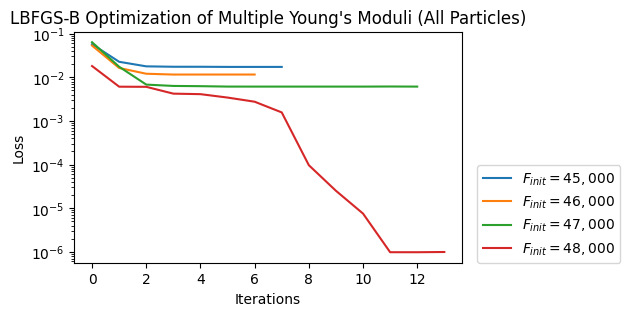

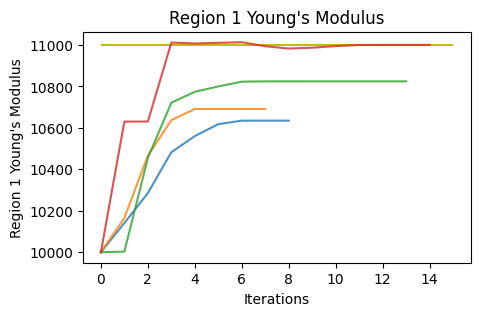

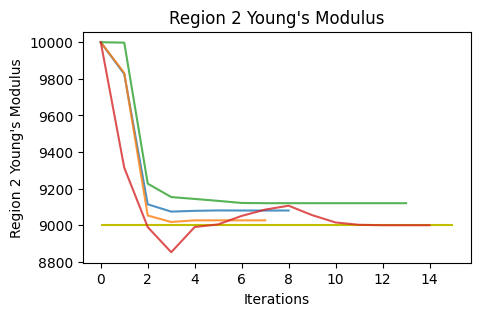

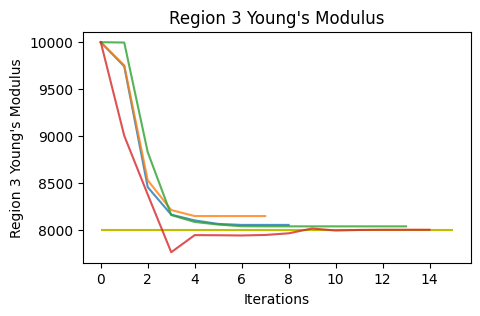

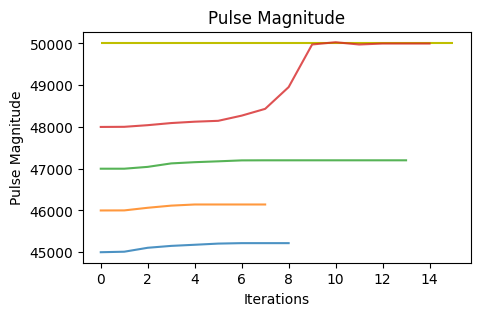

In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np

with open('result_full_f45.json') as json_file:
    result_full_f45 = json.load(json_file)
with open('result_full_f48.json') as json_file:
    result_full_f48 = json.load(json_file)
with open('result_full_f46.json') as json_file:
    result_full_f46 = json.load(json_file)
with open('result_full_f47.json') as json_file:
    result_full_f47 = json.load(json_file)



keys = ["E1", "E2", "E3", "F"]
regions = ['Region 1 Young\'s Modulus',
           'Region 2 Young\'s Modulus',
            'Region 3 Young\'s Modulus', 
            'Pulse Magnitude']

Es = [1.1e4, 0.9e4, 0.8e4, 5e4]
results = [result_full_f45, result_full_f46, result_full_f47, result_full_f48]
scale = [1, 1, 1, 1]
labels = ['$F_{init}=45,000$',
          '$F_{init}=46,000$',
          '$F_{init}=47,000$',
          '$F_{init}=48,000$']
plt.figure(figsize=(5,3))
plt.title("LBFGS-B Optimization of Multiple Young's Moduli (All Particles)")
plt.ylabel("Loss")
plt.xlabel("Iterations")
for j, result in enumerate(results):
    plt.plot(np.array(result["losses"]) * scale[j], label=labels[j])
plt.legend(loc=(1.04,0))
plt.yscale('log')
plt.show()


for i, key in enumerate(keys):
    plt.figure(figsize=(5,3))
    plt.title(regions[i])
    plt.ylabel(regions[i])
    plt.xlabel("Iterations")
    plt.hlines(Es[i], 0, 15, color='y', label='True Value')
    for j, result in enumerate(results):
        plt.plot(result[key], alpha=0.8, label=labels[j])
    # plt.legend()
    plt.show()


In [3]:
import matplotlib.pyplot as plt
import json

with open('result_full_e_f.json') as json_file:
    result_full_e_f = json.load(json_file)

len(result_full_e_f['losses'])


it_hist = result_full_e_f['it_hist']
n_ef_it = len(result_full_e_f['it_hist']) / 2

block_index = [sum(it_hist[:i+1]) for i in range(len(it_hist))]
block_index[0] += 1
block_index[1] += 1
block_index

[8, 13, 17, 18, 21, 33, 41, 46, 52, 55]

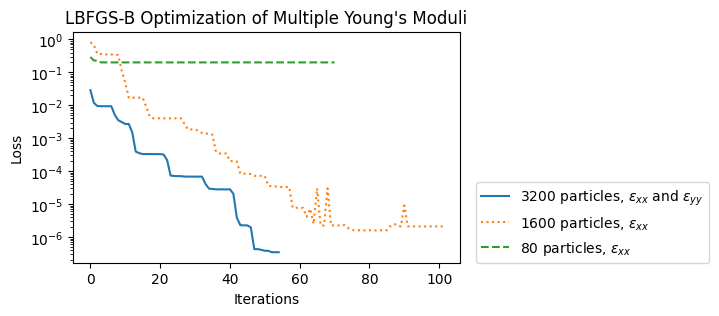

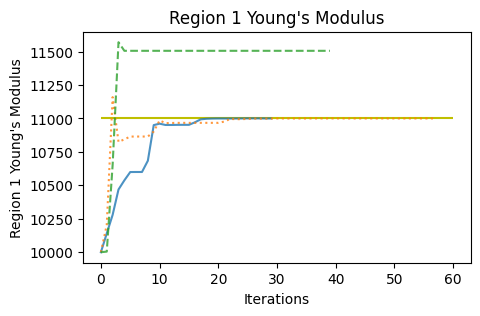

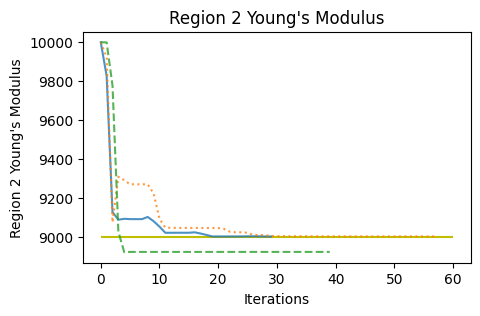

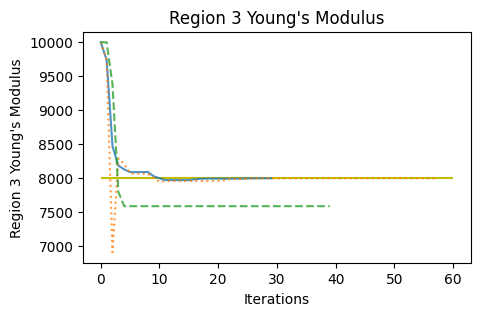

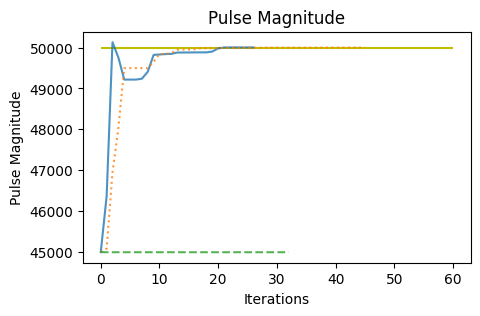

In [ ]:
import matplotlib.pyplot as plt
import json
import numpy as np

filenames = [
    'result_full_e_f.json',
    'result_1600x_block.json',
    'result_80x_block.json'
]
results = []
for name in filenames:

    with open(name) as json_file:
        result = json.load(json_file)
        results.append(result)

linestyle_str = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'
linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 5))),
     ('densely dotted',        (0, (1, 1))),

     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]
linestyles = linestyle_str + linestyle_tuple
linestyles = [style[1] for style in linestyles]


keys = ["E1", "E2", "E3", "F"]
Es = [1.1e4, 0.9e4, 0.8e4, 5e4]
scale = [1, 40, 40*2, 40*20, 40*10]
labels = ['3200 particles, $\epsilon_{xx}$ and $\epsilon_{yy}$',
          '1600 particles, $\epsilon_{xx}$', 
          '80 particles, $\epsilon_{xx}$',
          '40 particles, $\epsilon_{xx}$',
          '4 particles, $\epsilon_{xx}$',
          '8 particles, $\epsilon_{xx}$']
colors = []
plt.figure(figsize=(5,3))
plt.title("LBFGS-B Optimization of Multiple Young's Moduli")
plt.ylabel("Loss")
plt.xlabel("Iterations")
for j, result in enumerate(results):
    plt.plot(np.array(result["losses"]) * scale[j], label=labels[j], linestyle=linestyles[j])
    # for n_it in result['it_hist']:
    #     block_index = [sum(it_hist[:i+1]) for i in range(len(it_hist))]
    #     block_index[0] += 0
    #     block_index[1] += 0
        # plt.vlines(block_index[:-1], 1e-0, 1e-10, linestyle="dashed")
plt.legend(loc=(1.04,0))
plt.yscale('log')
plt.show()

regions = ['Region 1 Young\'s Modulus',
           'Region 2 Young\'s Modulus',
            'Region 3 Young\'s Modulus', 
            'Pulse Magnitude']
for i, key in enumerate(keys):
    plt.figure(figsize=(5,3))
    plt.title(regions[i])
    plt.ylabel(regions[i])
    plt.xlabel("Iterations")
    plt.hlines(Es[i], 0, 60, color='y', label='True Value')
    for j, result in enumerate(results):
        plt.plot(result[key], alpha=0.8, label=labels[j], linestyle=linestyles[j])
        # block_index = [sum(it_hist[:i+1]) for i in range(len(it_hist))]
        # block_index[0] += 1
        # block_index[1] += 1
        # plt.vlines(block_index[:-1], Es[i]*0.8, Es[i]*1.2, linestyle="dashed")
    # plt.legend(loc=(1.04,0))
    plt.show()


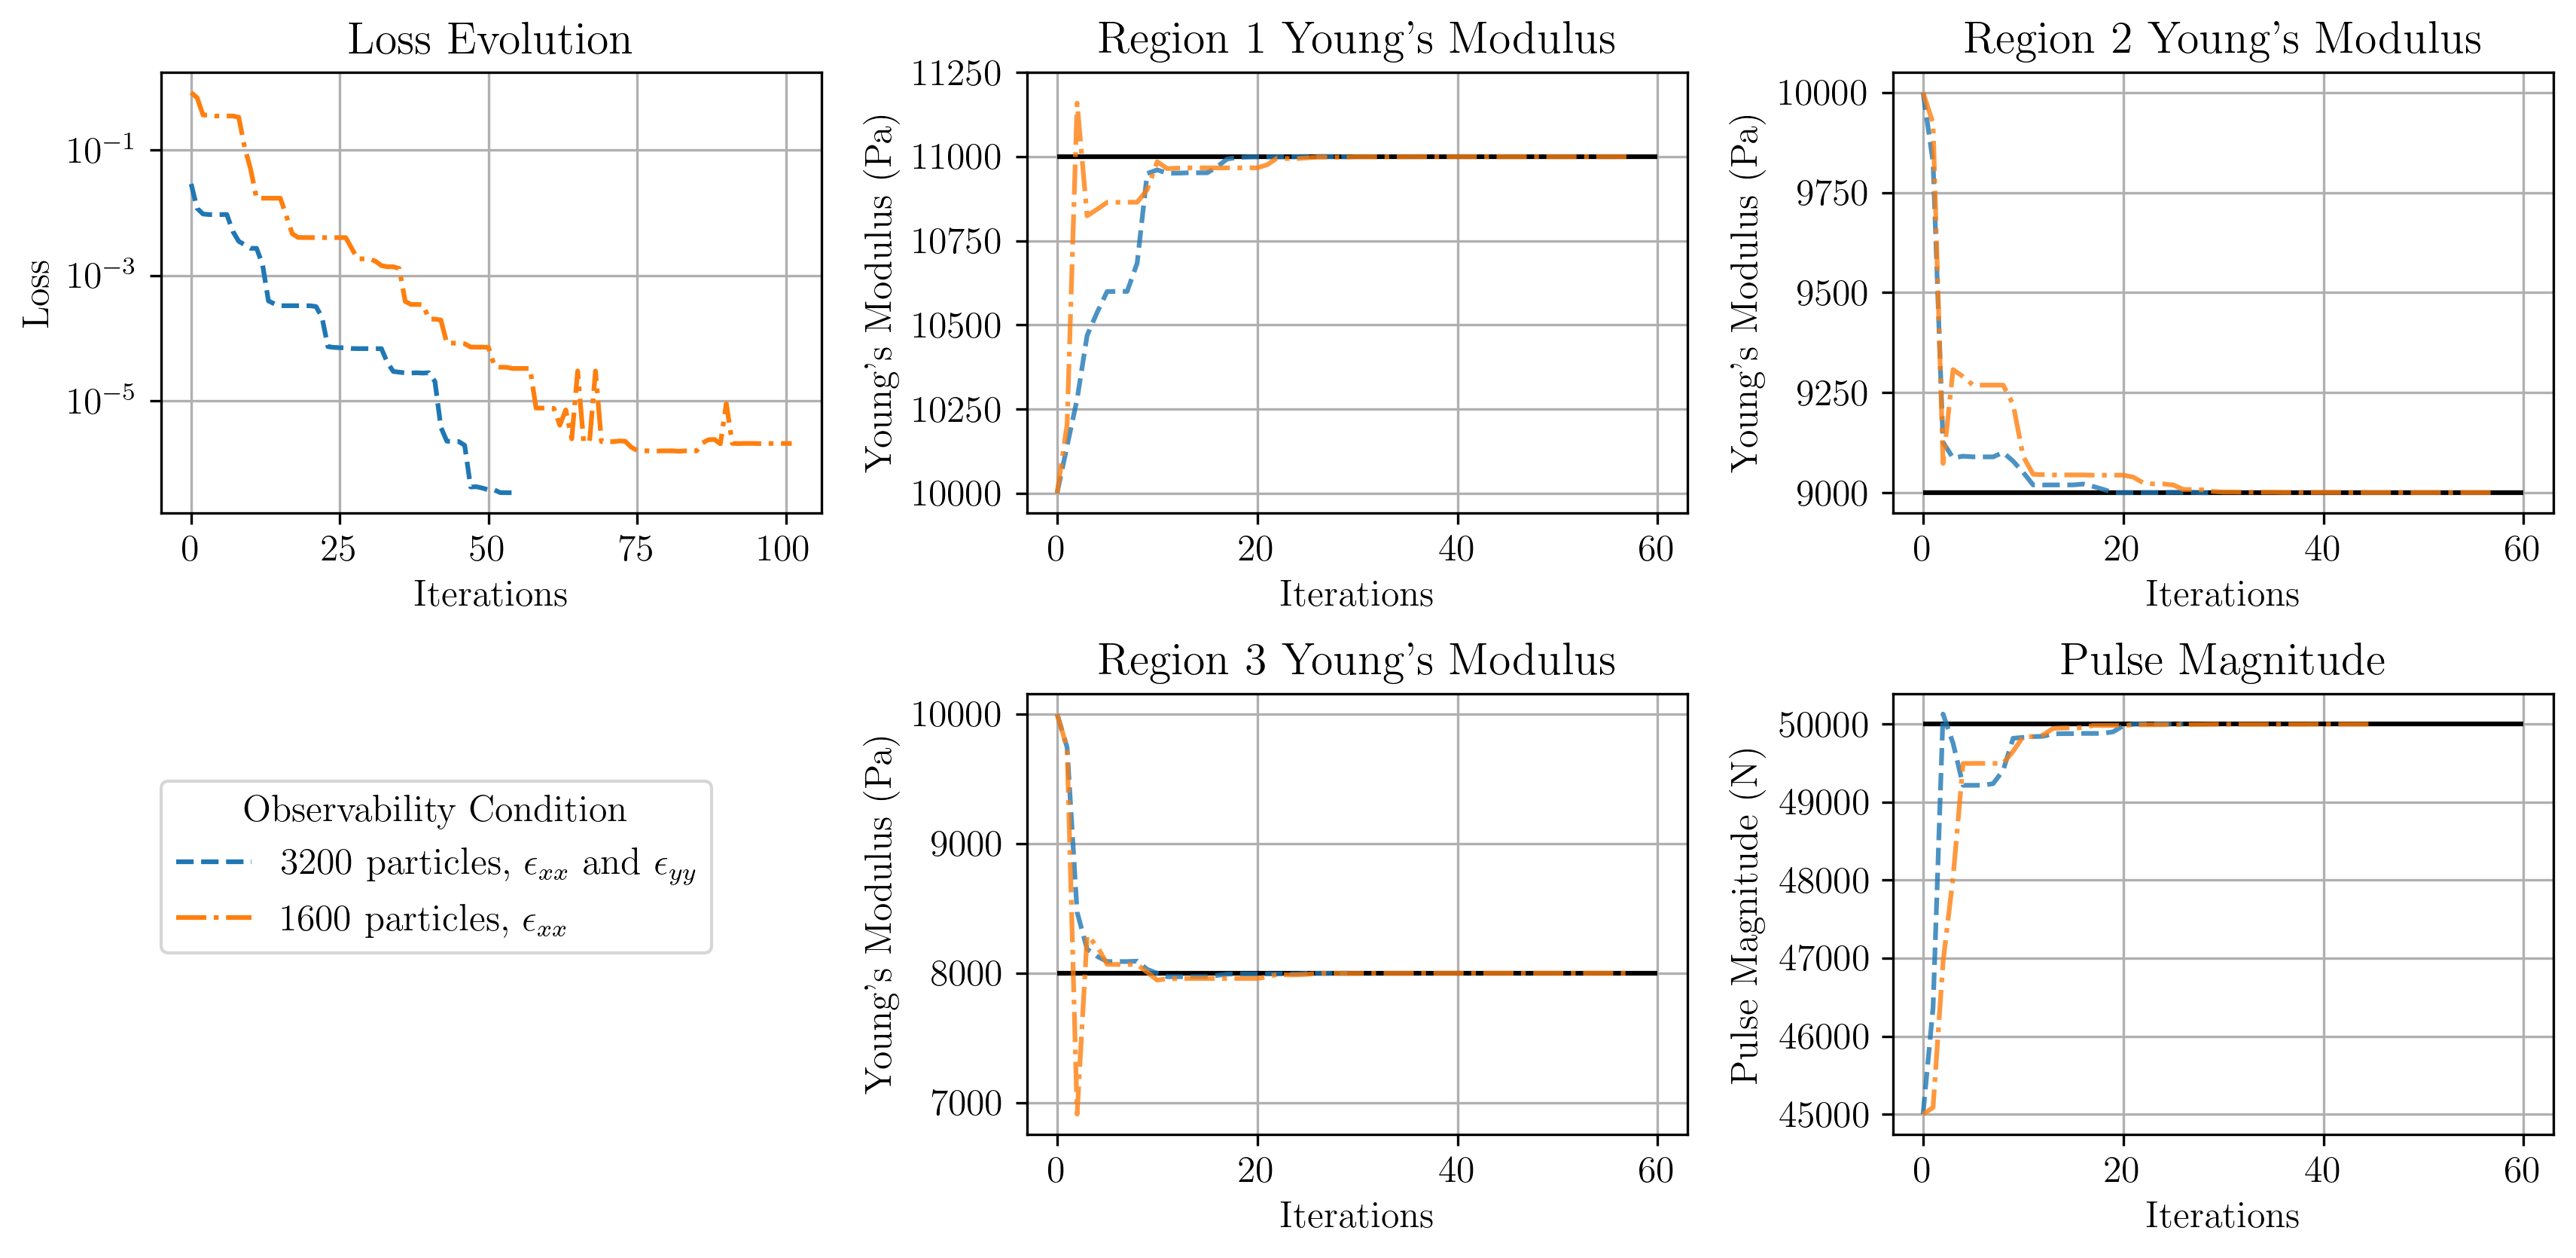

In [32]:
import matplotlib.pyplot as plt
import json
import numpy as np
import re

filenames = [
    'result_full_e_f.json',
    'result_1600x_block.json',
    # 'result_80x_block.json'
]
results = []
for name in filenames:

    with open(name) as json_file:
        result = json.load(json_file)
        results.append(result)

linestyle_str = [
    #  ('solid', 'solid'),      # Same as (0, ()) or '-'
    #  ('dotted', 'dotted'),    # Same as ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'
linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 5))),
     ('densely dotted',        (0, (1, 1))),

     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]
linestyles = linestyle_str + linestyle_tuple
linestyles = [style[1] for style in linestyles]
def gray(level):
    return (level, level, level)

keys = ["E1", "E2", "E3", "F"]
Es = [1.1e4, 0.9e4, 0.8e4, 5e4]
scale = [1, 40, 40*2, 40*20, 40*10]
labels = ['3200 particles, $\epsilon_{xx}$ and $\epsilon_{yy}$',
          '1600 particles, $\epsilon_{xx}$', 
          '80 particles, $\epsilon_{xx}$',
          '40 particles, $\epsilon_{xx}$',
          '4 particles, $\epsilon_{xx}$',
          '8 particles, $\epsilon_{xx}$']
colors = []

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('text', usetex = True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300
font = {'size'   : 12}
matplotlib.rc('font', **font)

fig, axs = plt.subplots(2,3, figsize=(12, 6))
# plt.suptitle('Beam Elastic Field and Force Optimization')
plt.tight_layout(pad=3)
# plt.figure(figsize=(5,3))
axs[0, 0].set_title("Loss Evolution")
axs[0, 0].set_ylabel("Loss")
axs[0, 0].set_xlabel("Iterations")
for j, result in enumerate(results):
    axs[0, 0].plot(np.array(result["losses"]) * scale[j], label=labels[j], linestyle=linestyles[j])#, color=gray(j*0.3+0.2))
    # for n_it in result['it_hist']:
    #     block_index = [sum(it_hist[:i+1]) for i in range(len(it_hist))]
    #     block_index[0] += 0
    #     block_index[1] += 0
        # plt.vlines(block_index[:-1], 1e-0, 1e-10, linestyle="dashed")
axs[0, 0].legend(loc=(0 , -1), title='Observability Condition')
axs[0, 0].set_yscale('log')
axs[1, 0].axis("off")

regions = ['Region 1 Young\'s Modulus',
           'Region 2 Young\'s Modulus',
            'Region 3 Young\'s Modulus', 
            'Pulse Magnitude']
mapping = {
    0: [0, 1],
    1: [0, 2],
    2: [1, 1],
    3: [1, 2]
}
for i, key in enumerate(keys):
    index = mapping[i]
    axs[index[0], index[1]].set_title(regions[i])

    y_label = re.search("Modulus", regions[i])
    if y_label is not None:
        y_label = regions[i][-16:] + " (Pa)"
    else:
        y_label = regions[i] + " (N)"
    axs[index[0], index[1]].set_ylabel(y_label)
    axs[index[0], index[1]].set_xlabel("Iterations")
    axs[index[0], index[1]].hlines(Es[i], 0, 60, color='k', label='True Value')
    for j, result in enumerate(results):
        axs[index[0], index[1]].plot(result[key], alpha=0.8, label=labels[j], linestyle=linestyles[j])#, color=gray(j*0.3+0.2))
        # block_index = [sum(it_hist[:i+1]) for i in range(len(it_hist))]
        # block_index[0] += 1
        # block_index[1] += 1
        # plt.vlines(block_index[:-1], Es[i]*0.8, Es[i]*1.2, linestyle="dashed")
    # plt.legend(loc=(1.04,0))
axs[0, 0].grid(True)
axs[0, 1].grid(True)
axs[0, 2].grid(True)
axs[1, 1].grid(True)
axs[1, 2].grid(True)
axs[0, 1].set_yticks(np.arange(10000, 11500, 250))
axs[0, 2].set_yticks(np.arange(9000, 10250, 250))
# axs[1, 1].set_yticks(np.arange(8000, 10250, 250))
axs[1, 2].set_yticks(np.arange(45000, 51000, 1000))
plt.show()


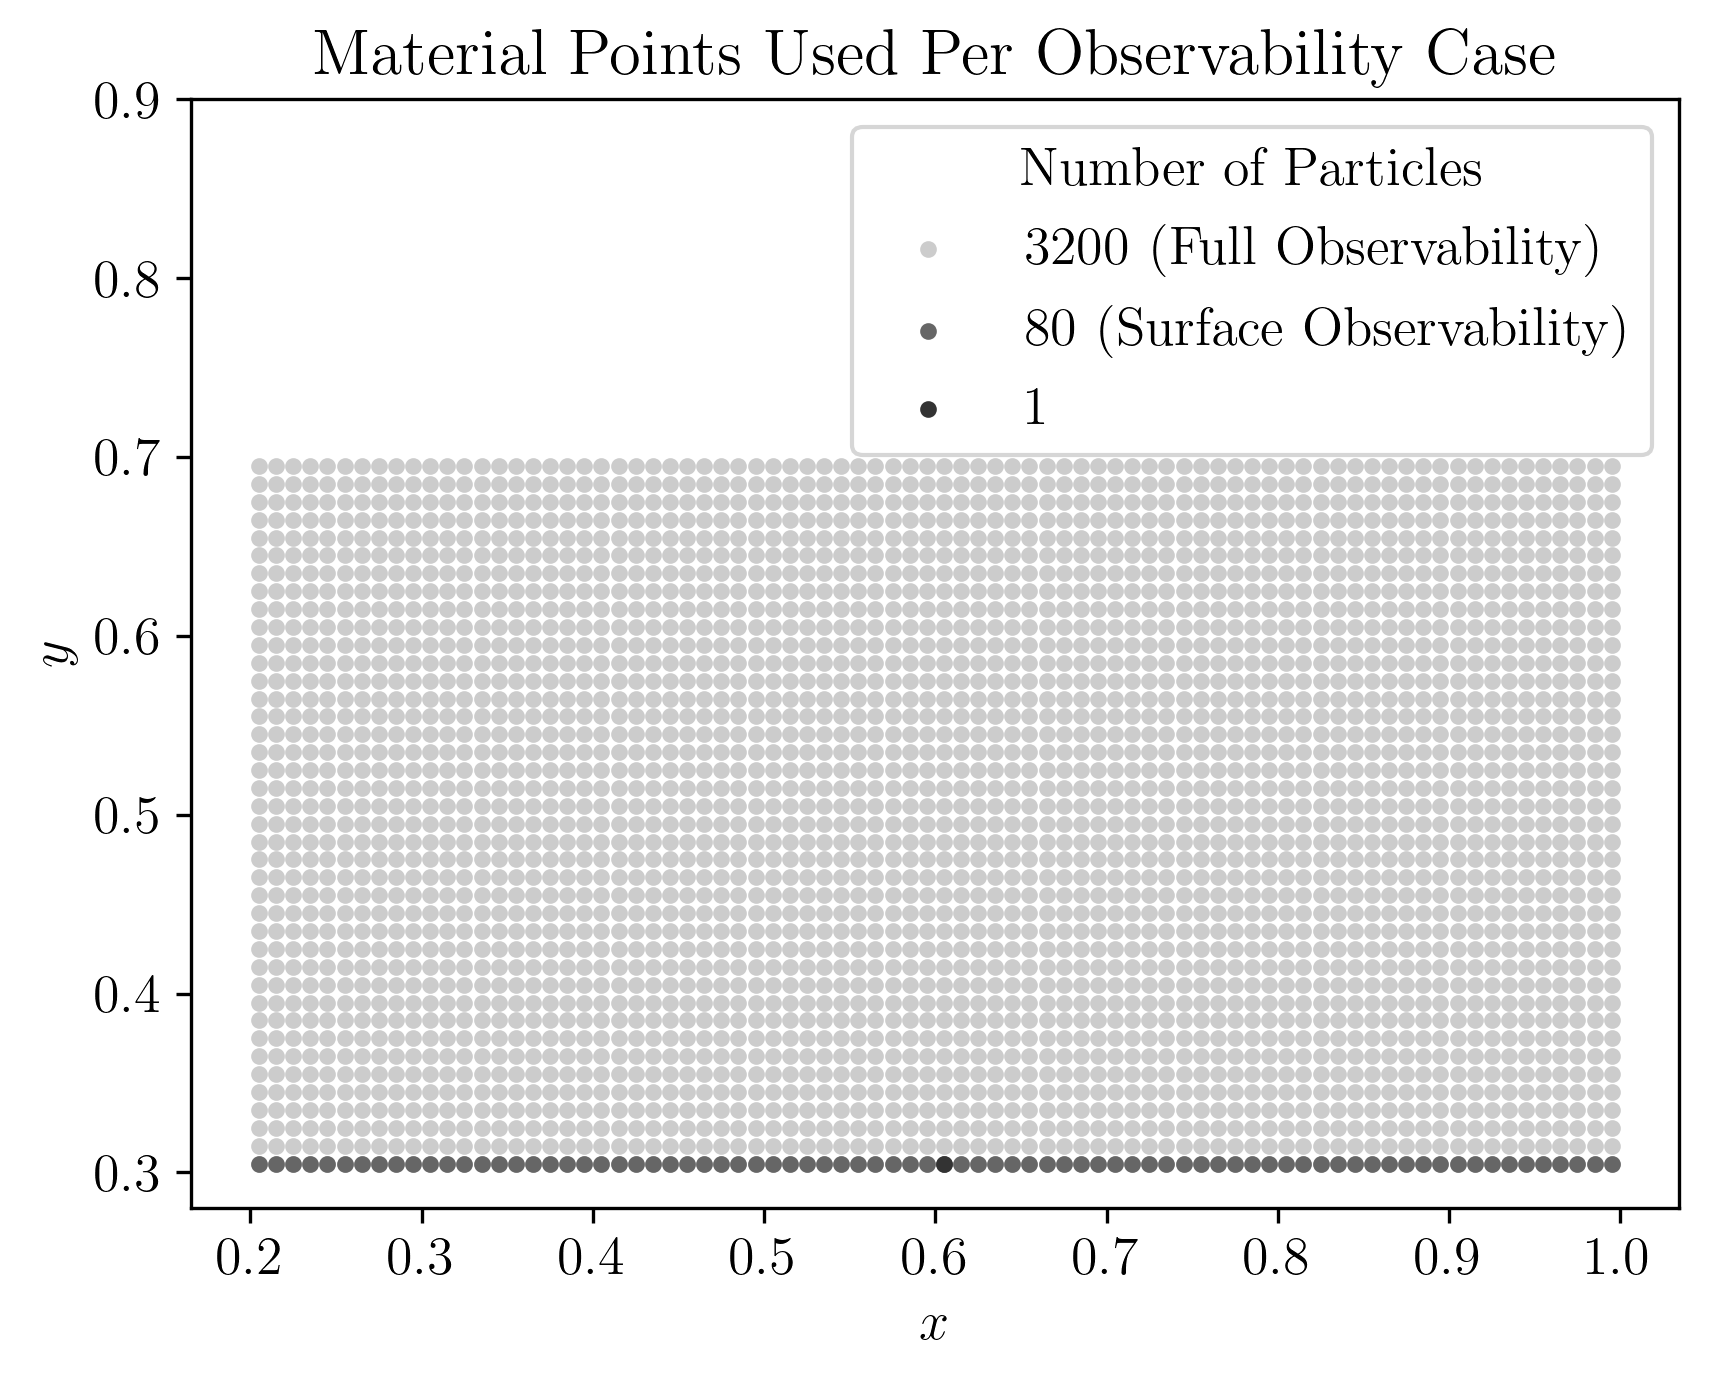

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rc('text', usetex = True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['figure.dpi'] = 300
font = {'size'   : 13}

matplotlib.rc('font', **font)

def gray(level):
    return (level, level, level)
x = np.load('x_f.npy')[0] + np.repeat([[0.1 + 0.8 / 80 * 0.5, 0.4 / 40 * 0.5]], 80*40, axis=0)
plt.scatter(x[:,0], x[:,1], marker='.', label='3200 (Full Observability)', color=gray(0.8))
plt.scatter(x[:80,0], x[:80,1], marker='.', label='80 (Surface Observability)', color=gray(0.4))
plt.scatter(x[40,0], x[40,1], marker='.', label='1', color=gray(0.2))
plt.legend(title='Number of Particles')
plt.title('Material Points Used Per Observability Case')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.ylim((0.28,0.9))
plt.show()